In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras import models, layers

In [2]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [19]:
X_test.shape

(10000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [6]:
classes[9]

'truck'

In [7]:
def plot_sample(X,y, index):
 plt.figure(figsize=(15,2))
 plt.imshow(X_train[0])
 plt.xlabel(classes[y[index]])

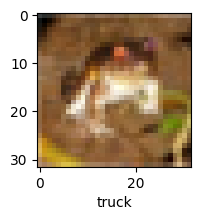

In [8]:
plot_sample(X_train,y_train, 1)

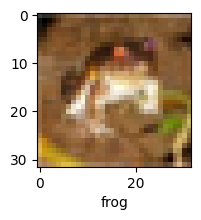

In [9]:
plot_sample(X_train,y_train,0)

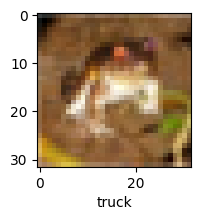

In [10]:
plot_sample(X_train,y_train,2)

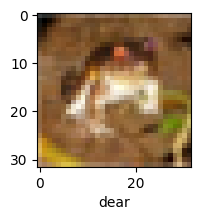

In [11]:
plot_sample(X_train,y_train,3)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [14]:
from keras import models, layers

ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),  # Corrected this line
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.3108 - loss: 1.9252
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4203 - loss: 1.6408
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4550 - loss: 1.5537
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4756 - loss: 1.4830
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4957 - loss: 1.4351
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.5069 - loss: 1.3936
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5222 - loss: 1.3618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.5333 - loss: 1.3202
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5504 - loss: 1.2818
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5628 - loss: 1.2499


In [15]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5216 - loss: 1.3447


[1.349801778793335, 0.5166000127792358]

In [16]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]  # Corrected this line
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.51      0.57      1000
           1       0.63      0.63      0.63      1000
           2       0.50      0.24      0.32      1000
           3       0.36      0.32      0.34      1000
           4       0.42      0.51      0.46      1000
           5       0.44      0.46      0.45      1000
           6       0.51      0.69      0.58      1000
           7       0.68      0.51      0.58      1000
           8       0.49      0.77      0.60      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



In [18]:
# Given values
value1 = 0.45
value2 = 0.67

# Calculate the result
result = value1 / (value1 + value2)

# Print the result
print("Result:", result)

Result: 0.40178571428571425


In [19]:
(0.67)/(0.45+0.67)

0.5982142857142857

In [20]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now fit the model with the integer labels
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.6205 - loss: 1.0861
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6900 - loss: 0.8924
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7346 - loss: 0.7625
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7696 - loss: 0.6583
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7974 - loss: 0.5776
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8238 - loss: 0.5030
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8503 - loss: 0.4301
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8715 - loss: 0.3685
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8897 - loss: 0.3164
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9101 - loss: 0.2638


In [44]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6748 - loss: 1.2818


[1.3166141510009766, 0.6748999953269958]

In [45]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

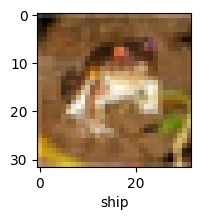

In [46]:
plot_sample(X_test,y_test,1)

In [47]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[5.08281664e-05, 3.65736108e-09, 2.32061507e-06, 9.98362184e-01,
        7.19065793e-05, 9.35696764e-04, 3.01790042e-05, 1.18831389e-09,
        5.46868192e-04, 2.53027510e-09],
       [2.53849360e-03, 1.66411735e-02, 2.67636635e-10, 2.25897789e-09,
        3.30965344e-13, 7.99929025e-13, 1.58722422e-08, 3.59336963e-13,
        9.80817616e-01, 2.74924173e-06],
       [1.50730405e-02, 1.13928961e-02, 3.46728018e-04, 1.31739990e-03,
        2.14001266e-05, 1.80392653e-05, 8.61348781e-06, 6.43925741e-05,
        9.60393310e-01, 1.13640912e-02],
       [9.85124290e-01, 8.46409512e-06, 1.39561323e-02, 3.29695322e-05,
        1.64682831e-04, 1.23056099e-08, 1.00600164e-06, 1.42170977e-08,
        7.01816578e-04, 1.06286925e-05],
       [4.73268136e-09, 7.43163142e-10, 9.55949727e-05, 1.32518995e-04,
        9.81481373e-01, 3.84660126e-07, 1.82900988e-02, 7.88369992e-09,
        3.14017501e-09, 1.45166409e-12]], dtype=float32)

In [48]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

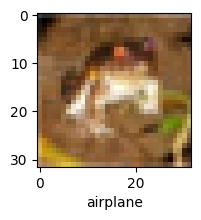

In [50]:
plot_sample(X_test,y_test,3)

In [51]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'dear',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
classes[y_classes[3]]

'airplane'

In [53]:
print("classification Report:\n",classification_report(y_test,y_classes))

classification Report:
               precision    recall  f1-score   support

           0       0.61      0.79      0.69      1000
           1       0.80      0.77      0.78      1000
           2       0.54      0.60      0.57      1000
           3       0.50      0.48      0.49      1000
           4       0.66      0.57      0.61      1000
           5       0.62      0.57      0.59      1000
           6       0.72      0.80      0.75      1000
           7       0.79      0.65      0.72      1000
           8       0.78      0.78      0.78      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

